# Data Analysis
## Warning: this doesn't work! The yahoo website doesn't seem to work anymore.
## A simple demo with pandas in Python



This notebook is based on course notes from Lamoureux's course Math 651 at the University of Calgary, Winter 2016.

This was an exercise to  try out some resourse in Python. Specifically, we want to scrape some data from the web concerning stock prices, and display in a Panda. Then do some basic data analysis on the information.

We take advantage of the fact that there is a lot of financial data freely accessible on the web, and lots of people post information about how to use it.


## Pandas in Python

### How to access real data from the web and apply data analysis tools.

I am using the book __Python for Data Analysis__ by Wes McKinney as a reference for this section.

The point of using Python for this is that a lot of people have created good code to do this. 

The pandas name comes from Panel Data, an econometrics terms for multidimensional structured data sets, as well as from Python Data Analysis.

The dataframe objects that appear in pandas originated in R. But apparently thery have more functionality in Python than in R. 

I will be using PYLAB as well in this section, so we can make use of NUMPY and MATPLOTLIB.

## Accessing financial data


For free, historical data on commodities like Oil, you can try this site: http://www.databank.rbs.com
This site will download data directly into spreadsheets for you, plot graphs of historical data, etc. Here is an example of oil prices (West Texas Intermdiate), over the last 15 years. Look how low it goes...

![Image from RBS DataBank](RBS_graph.jpg)

Yahoo supplies current stock and commodity prices. Here is an intereting site that tells you how to download loads of data into a csv file. 
http://www.financialwisdomforum.org/gummy-stuff/Yahoo-data.htm

Here is another site that discusses accessing various financial data sources. http://quant.stackexchange.com/questions/141/what-data-sources-are-available-online


### Loading data off the web
To get away from the highly contentious issues of oil prices and political parties, let's look at some simple stock prices -- say Apple and Microsoft. We can import some basic webtools to get prices directly from Yahoo.


In [17]:
# Get some basic tools
%pylab inline
from pandas import Series, DataFrame
import pandas as pd
#import pandas.io.data as web
#from pandas_datareader import data, web
#import pandas_datareader as pdr
from pandas_datareader import data as pdr
import fix_yahoo_finance


Populating the interactive namespace from numpy and matplotlib


In [19]:
# Here are apple and microsoft closing prices since 2016
start = datetime.datetime(2016,1,1)
end = datetime.date.today()
data = pdr.get_data_yahoo(["SPY", "IWM"], start="2017-01-01", end="2017-04-30")
# aapl = pdr.get_data_yahoo('AAPL')
#apple = pdr.DataReader('AAPL', 'yahoo', start, end)
#aapl = pdr.get_data_yahoo('AAPL','2001-01-01')['Adj Close']
#msft = pdr.get_data_yahoo('MSFT','2001-01-01')['Adj Close']
#subplot(2,1,1)
#plot(aapl)
#subplot(2,1,2)
#plot(msft)

Error: [('system library', 'fopen', 'No such file or directory'), ('BIO routines', 'BIO_new_file', 'no such file'), ('x509 certificate routines', 'X509_load_cert_crl_file', 'system lib')]

In [3]:
aapl


NameError: name 'aapl' is not defined

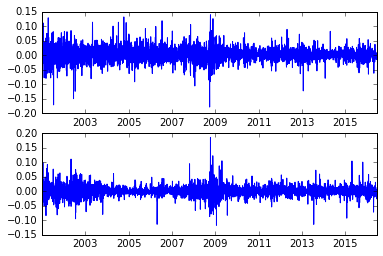

In [4]:
# Let's look at the changes in the stock prices, normalized as a percentage
aapl_rets = aapl.pct_change()
msft_rets = msft.pct_change()
subplot(2,1,1)
plot(aapl_rets)
subplot(2,1,2)
plot(msft_rets)

/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=250).corr(other=<Series>)
  from ipykernel import kernelapp as app


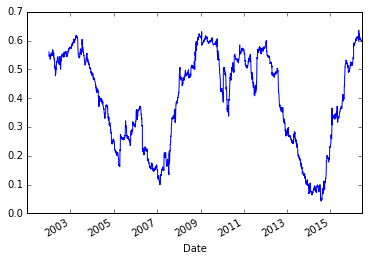

In [5]:
# Let's look at the correlation between these two series
pd.rolling_corr(aapl_rets, msft_rets, 250).plot()

### Getting fancy.
Now, we can use some more sophisticated statistical tools, like least squares regression. However, I had to do some work to get Python to recognize these items. But I didn't work too hard, I just followed the error messages.

It became clear that I needed to go back to a terminal window to load in some packages. The two commands I had to type in were
- pip install statsmodels
- pip install patsy

'pip' is an 'python installer package' that install packages of code onto your computer (or whatever machine is running your python). The two packages 'statsmodels' and 'patsy' are assorted statistical packages. I don't know much about them, but they are easy to find on the web.

In [6]:
# We may also try a least square regression, also built in as a panda function
model = pd.ols(y=aapl_rets, x={'MSFT': msft_rets},window=256)


/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html
  from ipykernel import kernelapp as app


In [7]:
model.beta

,MSFT,intercept
Date,,
2002-01-14,0.796463,0.000416
2002-01-15,0.788022,0.000417
2002-01-16,0.789784,0.000191
2002-01-17,0.802081,0.000600
2002-01-18,0.793941,0.000671
2002-01-22,0.796478,0.000718
2002-01-23,0.797909,0.001172
2002-01-24,0.786143,0.000960
2002-01-25,0.781526,0.001102


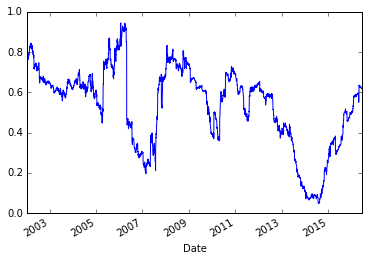

In [8]:
model.beta['MSFT'].plot()

/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=250).corr(other=<Series>)
  app.launch_new_instance()


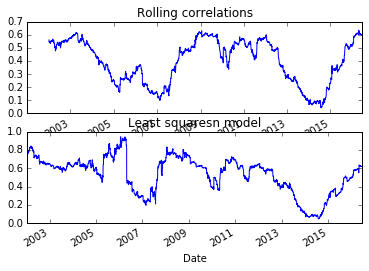

In [9]:
# Those two graphs looked similar. Let's plot them together
subplot(2,1,1)
pd.rolling_corr(aapl_rets, msft_rets, 250).plot()
title('Rolling correlations')
subplot(2,1,2)
model.beta['MSFT'].plot()
title('Least squaresn model')



### more stocks
There is all kinds of neat info on the web. Here is the SPY exchange-traded fund, which tracks the S&P 500 index.

In [10]:
px = web.get_data_yahoo('SPY')['Adj Close']*10
px

Date
2010-01-04     998.08658
2010-01-05    1000.72861
2010-01-06    1001.43318
2010-01-07    1005.66052
2010-01-08    1009.00712
2010-01-11    1010.41626
2010-01-12    1000.99287
2010-01-13    1009.44749
2010-01-14    1012.17761
2010-01-15    1000.81670
2010-01-19    1013.32249
2010-01-20    1003.01842
2010-01-21     983.73128
2010-01-22     961.80210
2010-01-25     966.73395
2010-01-26     962.68278
2010-01-27     967.26241
2010-01-28     956.16569
2010-01-29     945.77354
2010-02-01     960.48105
2010-02-02     972.10617
2010-02-03     967.26241
2010-02-04     937.40701
2010-02-05     939.34454
2010-02-08     932.56318
2010-02-09     944.27638
2010-02-10     942.42694
2010-02-11     952.29063
2010-02-12     951.49804
2010-02-16     966.46975
                 ...    
2016-05-04    2050.09995
2016-05-05    2049.70001
2016-05-06    2057.20001
2016-05-09    2058.89999
2016-05-10    2084.49997
2016-05-11    2065.00000
2016-05-12    2065.59998
2016-05-13    2047.59995
2016-05-16    2067.7

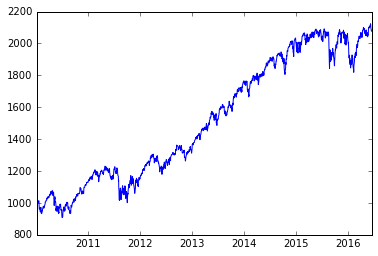

In [11]:
plot(px)